<a href="https://colab.research.google.com/github/Yohk2291/MachineLearning/blob/master/CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KerasでCNNを実装


ライブラリのインポート

In [0]:
# numpy
import numpy as np

# kerasから必要なライブラリをimport
from keras import utils
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model



# 描画に使うライブラリ
import matplotlib.pyplot as plt

Cifer10のロードと可視化

In [0]:
# データのロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# ラベルとクラス数の定義
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])
n_classes = 10

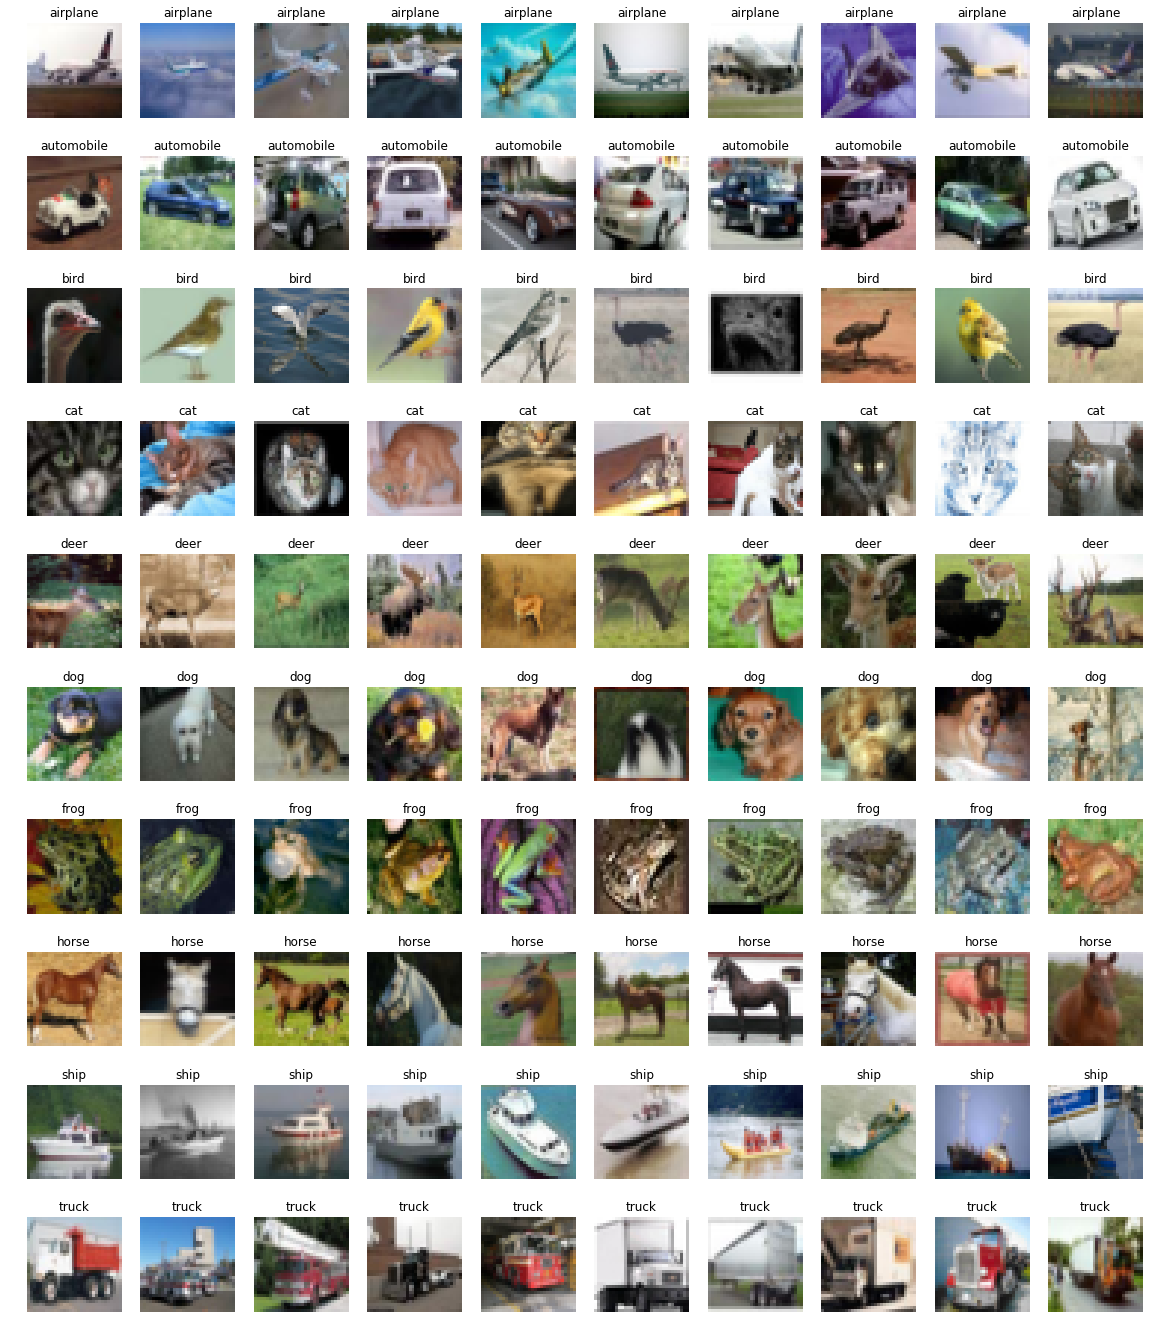

In [17]:
pos = 1
plt.figure(figsize=(20,24))

# 各クラスごとにプロット
for targetClass in range(n_classes):
    targetIdx = []
    # クラスclassIDの画像のインデックスリストを取得
    for i in range(len(y_train)):
        if y_train[i][0] == targetClass:
            targetIdx.append(i)

    # 各クラスからランダムに選んだ最初の10個の画像を描画
    np.random.shuffle(targetIdx)
    for idx in targetIdx[:10]:
        plt.subplot(10, 10, pos)
        plt.imshow(X_train[idx])
        plt.axis('off')
        plt.title(cifar10_labels[y_train[idx][0]])
        pos += 1
plt.show()

In [0]:
# 入力画像の前処理（正規化）
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 出力ラベルの前処理（カテゴリカル変数化）
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

バッチサイズ500、エポック数150（以下共通）

In [0]:
# 学習パラメータの定義
batch_size = 500
epochs = 150
steps_per_epoch = X_train.shape[0] // batch_size
validation_steps = X_test.shape[0] // batch_size


## CNNの実装(1) ベースモデル

In [20]:
# CNNモデルの定義
model = Sequential()

model.add(Conv2D(64, (3,3),   # チャンネル数を増やす 10->64
                 padding='same',
                 input_shape=(32, 32, 3), activation='relu')) 

model.add(Conv2D(64, (3,3), padding='same', activation='relu')) # 1つめのConvと同様

model.add(BatchNormalization()) # Batch Normalizationを使う
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, (3,3), padding='same', activation='relu')) 
model.add(Conv2D(128, (3,3), padding='same', activation='relu')) 

model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model.add(Conv2D(256, (3,3), padding='same', activation='relu')) 

model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)      

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
# 学習
train_gen = ImageDataGenerator().flow(X_train, y_train, batch_size )
val_gen = ImageDataGenerator().flow(X_test, y_test, batch_size)
history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch = steps_per_epoch,\
                          validation_data = val_gen, validation_steps =validation_steps)

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/150
100/100 [==============================] - 27s 272ms/step - loss: 1.9706 - acc: 0.3082 - val_loss: 1.8982 - val_acc: 0.3803
Epoch 2/150
100/100 [==============================] - 26s 256ms/step - loss: 1.3830 - acc: 0.4988 - val_loss: 2.2763 - val_acc: 0.3387
Epoch 3/150
100/100 [==============================] - 26s 255ms/step - loss: 1.1492 - acc: 0.5864 - val_loss: 1.1637 - val_acc: 0.5945
Epoch 4/150
100/100 [==============================] - 26s 255ms/step - loss: 0.9909 - acc: 0.6475 - val_loss: 1.2571 - val_acc: 0.5650
Epoch 5/150
100/100 [==============================] - 25s 255ms/step - loss: 0.8739 - acc: 0.6897 - val_loss: 0.9160 - val_acc: 0.6816
Epoch 6/150
100/100 [==============================] - 25s 255ms/step - loss: 0.7831 - acc: 0.7250 - val_loss: 0.8672 - val_acc: 0.7041
Epoch 7/150
100/100 [==============================] - 25s 255ms/step - loss: 0.7185 - acc: 0.7449 - val_loss: 0.7255 - val_acc: 0.7512
Epoch 8/150
100/100 [===========================

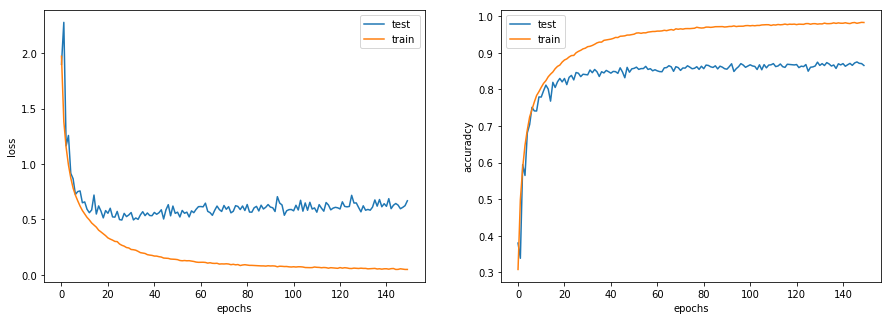

In [23]:
# 各epochののコストと精度をプロット
fig = plt.figure(figsize=(15,5))

# コストのプロット
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# 精度のプロット
plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuradcy')

plt.show()

## CNNの実装(2) Data Argumentation

ベースモデルを使用して、教師データを水増し

In [24]:
# CNNモデルの定義
model2 = Sequential()

model2.add(Conv2D(64, (3,3),   # チャンネル数を増やす 10->64
                 padding='same',
                 input_shape=(32, 32, 3), activation='relu')) 

model2.add(Conv2D(64, (3,3), padding='same', activation='relu')) # 1つめのConvと同様

model2.add(BatchNormalization()) # Batch Normalizationを使う
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Conv2D(128, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(128, (3,3), padding='same', activation='relu')) 

model2.add(BatchNormalization()) 
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(256, (3,3), padding='same', activation='relu')) 

model2.add(BatchNormalization()) 
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Flatten())

model2.add(Dense(100, activation='relu'))
model2.add(Dense(n_classes, activation='softmax'))


model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)      

In [0]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
train_gen_new = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=20,  
        zoom_range = 0.2, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        channel_shift_range = 0.2,
        horizontal_flip=True,  
        vertical_flip=False).flow(X_train,y_train, batch_size )


In [27]:
# 学習
val_gen = ImageDataGenerator().flow(X_test, y_test, batch_size)
history = model2.fit_generator(train_gen_new, epochs=epochs, steps_per_epoch = steps_per_epoch,\
                          validation_data = val_gen, validation_steps =validation_steps)

score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/150
100/100 [==============================] - 42s 416ms/step - loss: 2.4355 - acc: 0.2023 - val_loss: 1.9553 - val_acc: 0.3002
Epoch 2/150
100/100 [==============================] - 39s 392ms/step - loss: 1.7954 - acc: 0.3371 - val_loss: 1.4999 - val_acc: 0.4496
Epoch 3/150
100/100 [==============================] - 39s 393ms/step - loss: 1.6108 - acc: 0.4115 - val_loss: 1.6667 - val_acc: 0.4232
Epoch 4/150
100/100 [==============================] - 39s 390ms/step - loss: 1.4723 - acc: 0.4668 - val_loss: 1.3770 - val_acc: 0.5183
Epoch 5/150
100/100 [==============================] - 39s 389ms/step - loss: 1.3712 - acc: 0.5027 - val_loss: 1.2925 - val_acc: 0.5396
Epoch 6/150
100/100 [==============================] - 39s 390ms/step - loss: 1.2909 - acc: 0.5342 - val_loss: 1.3022 - val_acc: 0.5718
Epoch 7/150
100/100 [==============================] - 39s 392ms/step - loss: 1.2245 - acc: 0.5624 - val_loss: 1.2404 - val_acc: 0.5968
Epoch 8/150
100/100 [===========================

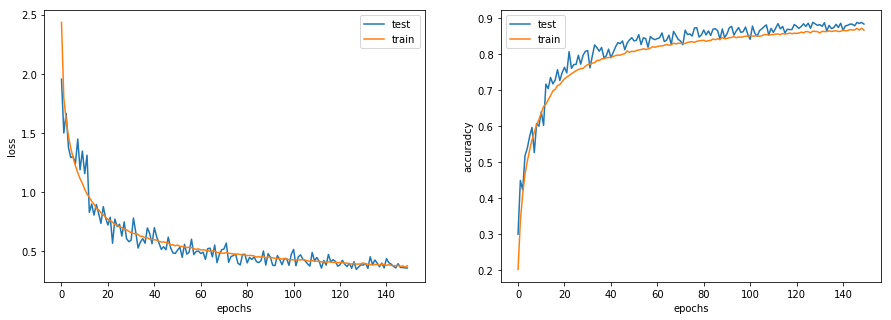

In [28]:
# 各epochののコストと精度をプロット
fig = plt.figure(figsize=(15,5))

# コストのプロット
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# 精度のプロット
plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuradcy')

plt.show()

## CNNの実装(3) 層を増やす

In [29]:
# CNNモデルの定義
model3 = Sequential()

model3.add(Conv2D(64, (3,3),  padding='same', input_shape=(32, 32, 3), activation='relu')) 
model3.add(Conv2D(64, (3,3), padding='same', activation='relu')) 

model3.add(BatchNormalization()) # Batch Normalizationを使う
model3.add(Conv2D(64, (3,3), padding='same', activation='relu')) 
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.5))


model3.add(Conv2D(128, (3,3), padding='same', activation='relu')) 
model3.add(Conv2D(128, (3,3), padding='same', activation='relu')) 

model3.add(BatchNormalization()) 
model3.add(Conv2D(128, (3,3), padding='same', activation='relu')) 
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.5))


model3.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model3.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model3.add(BatchNormalization()) 

model3.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model3.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model3.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model3.add(BatchNormalization()) 

model3.add(Conv2D(512, (3,3), padding='same', activation='relu')) 
model3.add(Conv2D(512, (3,3), padding='same', activation='relu'))  
model3.add(GlobalAveragePooling2D())


model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(n_classes, activation='softmax'))


model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 128)      

In [0]:
model3.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
# 学習
val_gen = ImageDataGenerator().flow(X_test, y_test, batch_size)
history = model3.fit_generator(train_gen_new, epochs=epochs, steps_per_epoch = steps_per_epoch,\
                          validation_data = val_gen, validation_steps =validation_steps)

score = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/150
100/100 [==============================] - 66s 662ms/step - loss: 2.2447 - acc: 0.1849 - val_loss: 5.5229 - val_acc: 0.1709
Epoch 2/150
100/100 [==============================] - 59s 588ms/step - loss: 1.9204 - acc: 0.2668 - val_loss: 2.5306 - val_acc: 0.1968
Epoch 3/150
100/100 [==============================] - 59s 586ms/step - loss: 1.7623 - acc: 0.3323 - val_loss: 2.8052 - val_acc: 0.2440
Epoch 4/150
100/100 [==============================] - 59s 587ms/step - loss: 1.6237 - acc: 0.3904 - val_loss: 1.9408 - val_acc: 0.3972
Epoch 5/150
100/100 [==============================] - 59s 586ms/step - loss: 1.4966 - acc: 0.4492 - val_loss: 1.9874 - val_acc: 0.4295
Epoch 6/150
100/100 [==============================] - 59s 587ms/step - loss: 1.3966 - acc: 0.4914 - val_loss: 1.8657 - val_acc: 0.4100
Epoch 7/150
100/100 [==============================] - 58s 585ms/step - loss: 1.3066 - acc: 0.5316 - val_loss: 1.5712 - val_acc: 0.5095
Epoch 8/150
100/100 [===========================

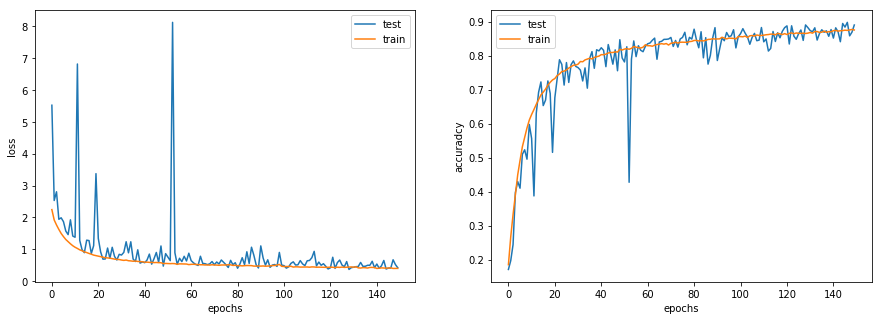

In [32]:
# 各epochののコストと精度をプロット
fig = plt.figure(figsize=(15,5))

# コストのプロット
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# 精度のプロット
plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuradcy')

plt.show()

## CNNの実装(4) 学習率逓減(ReduceLROnPlateau)